In [13]:
import librosa
import numpy as np
import pandas as pd

In [16]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  20


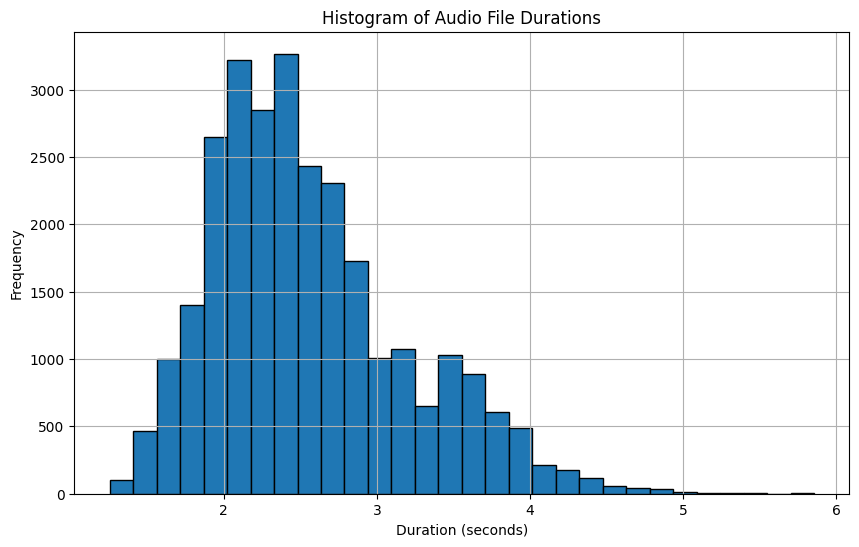

In [5]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt

csv_file_path = r"D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\train_test_splited_data\augmentation_data\train_file_paths_with_labels.csv"
df = pd.read_csv(csv_file_path)

file_paths = []
durations = []

for index, row in df.iterrows():
    file_path = row['file_path']
    try:
        data, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=data, sr=sr)

        file_paths.append(file_path)
        durations.append(duration)
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")

plt.figure(figsize=(10, 6))
plt.hist(durations, bins=30, edgecolor='k')
plt.title('Histogram of Audio File Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

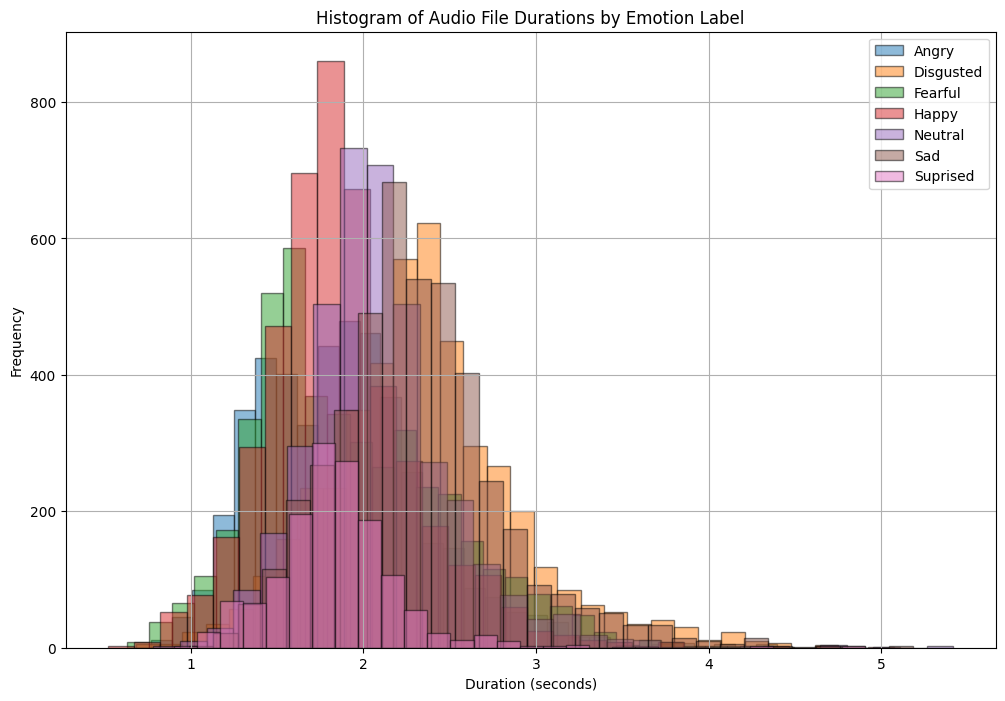

In [2]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt

csv_file_path = r"D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\train_test_splited_data\cleaned\train_file_paths_with_labels.csv"
df = pd.read_csv(csv_file_path)

# Tạo dictionary để lưu trữ độ dài của tệp âm thanh cho mỗi label
label_durations = {}

for index, row in df.iterrows():
    file_path = row['cleaned_file_path']
    label = row['label']
    try:
        data, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=data, sr=sr)

        # Thêm độ dài vào dictionary theo label
        if label not in label_durations:
            label_durations[label] = []
        label_durations[label].append(duration)
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")

# Vẽ histogram cho mỗi label
plt.figure(figsize=(12, 8))
for label, durations in label_durations.items():
    plt.hist(durations, bins=30, edgecolor='k', alpha=0.5, label=label)

plt.title('Histogram of Audio File Durations by Emotion Label')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import pandas as pd
import librosa
import numpy as np

# Hàm tính Zero Crossing Rate (ZCR)
def calculate_zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

# Hàm tính MFCC
def calculate_mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc = librosa.feature.mfcc(data, sr=sr)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

# Hàm trích xuất các đặc trưng
def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    zcr_result = calculate_zcr(data, frame_length, hop_length)
    mfcc_result = calculate_mfcc(data, sr, frame_length, hop_length)
    return np.hstack((zcr_result, mfcc_result))

# Đường dẫn tới tệp CSV
file = r"D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\train_test_splited_data\cleaned_data\train_file_paths_with_labels.csv"

# Load tệp CSV vào DataFrame
df = pd.read_csv(file)

# Khởi tạo biến max_zcr_length và min_zcr_length
max_zcr_length = float('-inf')
min_zcr_length = float('inf')

# Lặp qua mỗi dòng trong DataFrame
for index, row in df.iterrows():
    file_path = row['cleaned_file_path']
    audio_data, sr = librosa.load(file_path, sr=None)  # Tải dữ liệu âm thanh từ file

    # Trích xuất đặc trưng từ dữ liệu âm thanh
    # features = extract_features(audio_data, sr)

    # Tính độ dài ZCR và cập nhật max, min nếu cần
    zcr_length = len(calculate_zcr(audio_data))
    if zcr_length > max_zcr_length:
        max_zcr_length = zcr_length
    if zcr_length < min_zcr_length:
        min_zcr_length = zcr_length

# In ra độ dài ZCR lớn nhất và nhỏ nhất
print("Max ZCR Length:", max_zcr_length)
print("Min ZCR Length:", min_zcr_length)


Max ZCR Length: 253
Min ZCR Length: 30
